In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

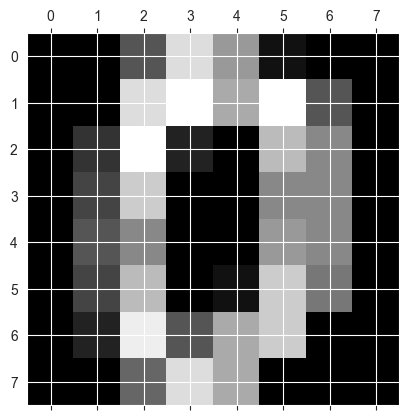

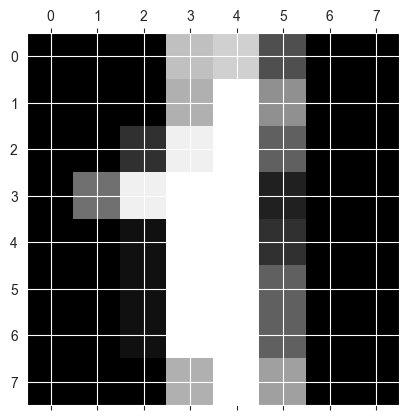

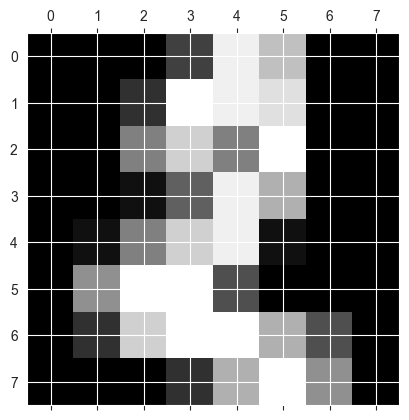

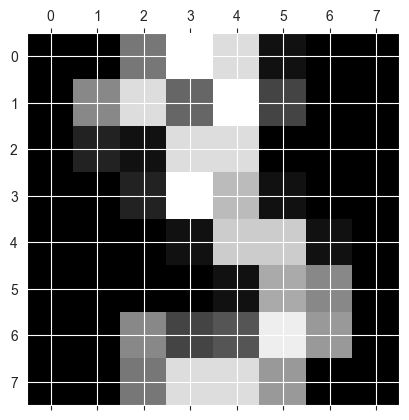

In [3]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i], cmap='gray')

In [4]:
df = pd.DataFrame(digits.data)
df["target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
# separating the data to test_data and train_data
from sklearn.model_selection import train_test_split
# the accuracy can be increased by lessening the value of the test dataset
# means by increasing the train dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis = "columns"),digits.target, test_size = 0.05, random_state = 42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
# fine tuning with the values
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
model.score(X_test, y_test)

1.0

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'True label')

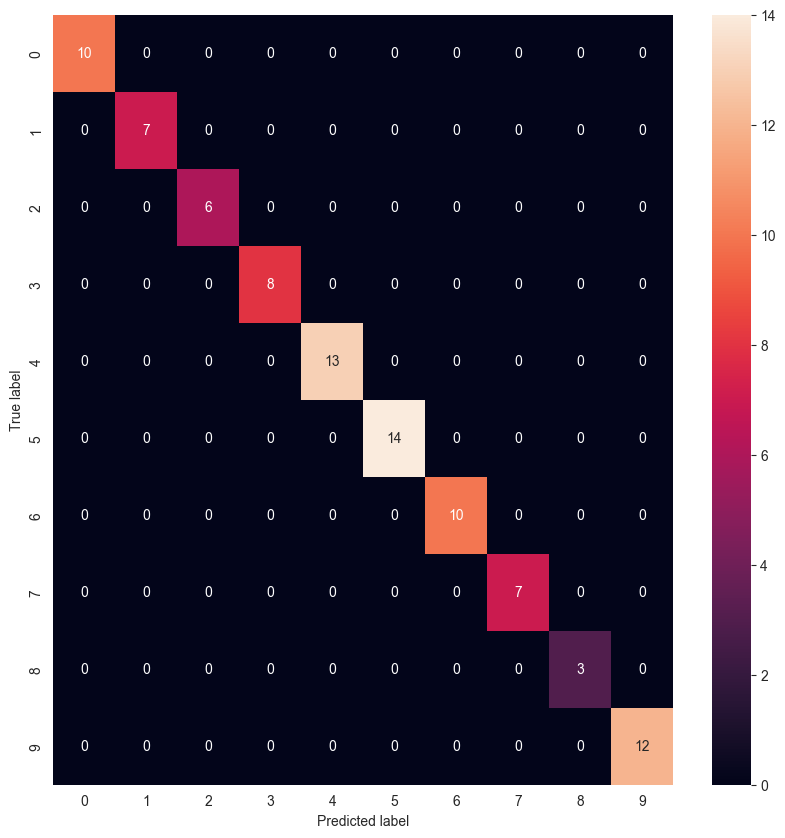

In [9]:
    import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,10)) # this was the size of the image
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")